In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##군집화 진행(K-Means, DBSCAN)

In [3]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq
'''

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n\n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\n'

In [4]:
df=pd.read_csv('/content/drive/MyDrive/유진_나경_프로젝트 정리 폴더/환경 데이터 분석/2.EDA/predict_firescale_df.csv')

In [5]:
#결측치 확인
df.isnull().sum()

Unnamed: 0     0
연도             0
월              0
일              0
시간             0
시군구명           0
읍면동명           0
온도             0
습도             0
시간단위풍속        31
현장소방서거리        0
화재진압시간         0
전체인력수합계        0
damagearea     0
dtype: int64

In [6]:
df['피해면적']=df['damagearea']

In [7]:
df=df.drop(columns=['damagearea']);df

,Unnamed: 0,연도,월,일,시간,시군구명,읍면동명,온도,습도,시간단위풍속,현장소방서거리,화재진압시간,전체인력수합계,피해면적
0,2,2021.0,1.0,12.0,11,홍천군,동면,-7.0,59.0,270.0,27.0,24740.0,48.0,0.15
1,3,2021.0,1.0,12.0,11,홍천군,동면,-8.0,59.0,270.0,28.0,24740.0,48.0,0.15
2,4,2021.0,1.0,15.0,15,인제군,인제읍,-2.0,69.0,315.0,11.0,193251.0,54.0,0.02
3,5,2021.0,1.0,15.0,15,인제군,인제읍,-2.0,69.0,315.0,11.0,193251.0,54.0,0.21
4,7,2021.0,1.0,20.0,14,횡성군,공근면,6.0,31.0,225.0,14.0,20028.0,92.0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,1146,2011.0,6.0,12.0,14,삼척시,마평동,19.0,75.0,0.0,13.0,33000.0,53.0,0.10
514,1149,2011.0,10.0,6.0,18,화천군,화천읍,18.0,34.0,225.0,57.0,4400.0,70.0,0.30
515,1150,2011.0,10.0,7.0,14,홍천군,남면,21.0,31.0,225.0,18.0,13802.0,58.0,0.01
516,1157,2011.0,11.0,1.0,15,화천군,화천읍,14.0,63.0,135.0,57.0,10300.0,299.0,3.00


In [8]:
df_x=df[['화재진압시간','전체인력수합계','피해면적']]

K-Means clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
# k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는지 시각화
import matplotlib.pyplot as plt
import seaborn as sns

def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(df_x)
        sum_of_squared_distance.append(kmeans.inertia_)

    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.title(" k에 따른 inertia_(군집 내 거리제곱합의 합)")
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

In [11]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  func(*arg

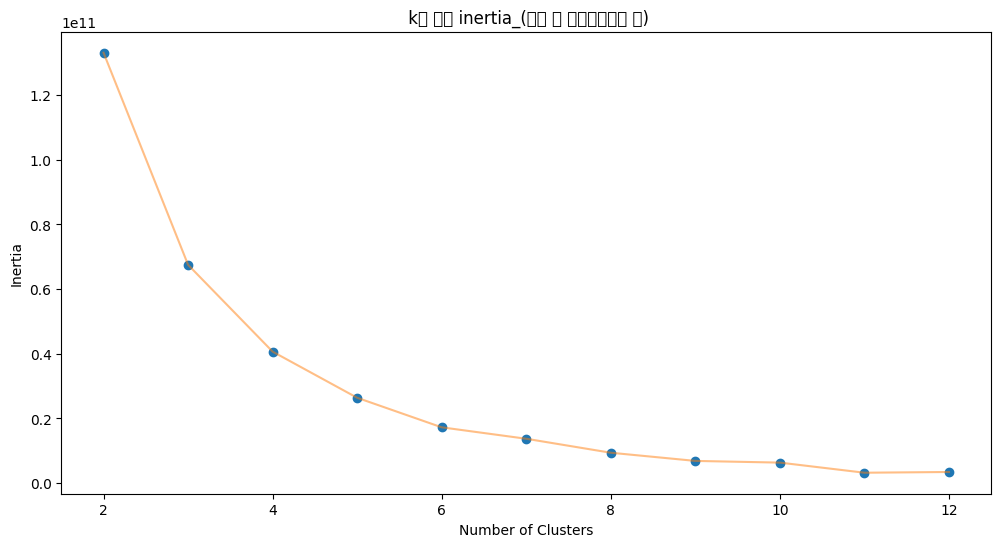

In [12]:

change_n_clusters(n_clusters, df_x)

n_clusters 3은 너무 적고 최소 5인데 5 초과는 한계가 있어보임

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args

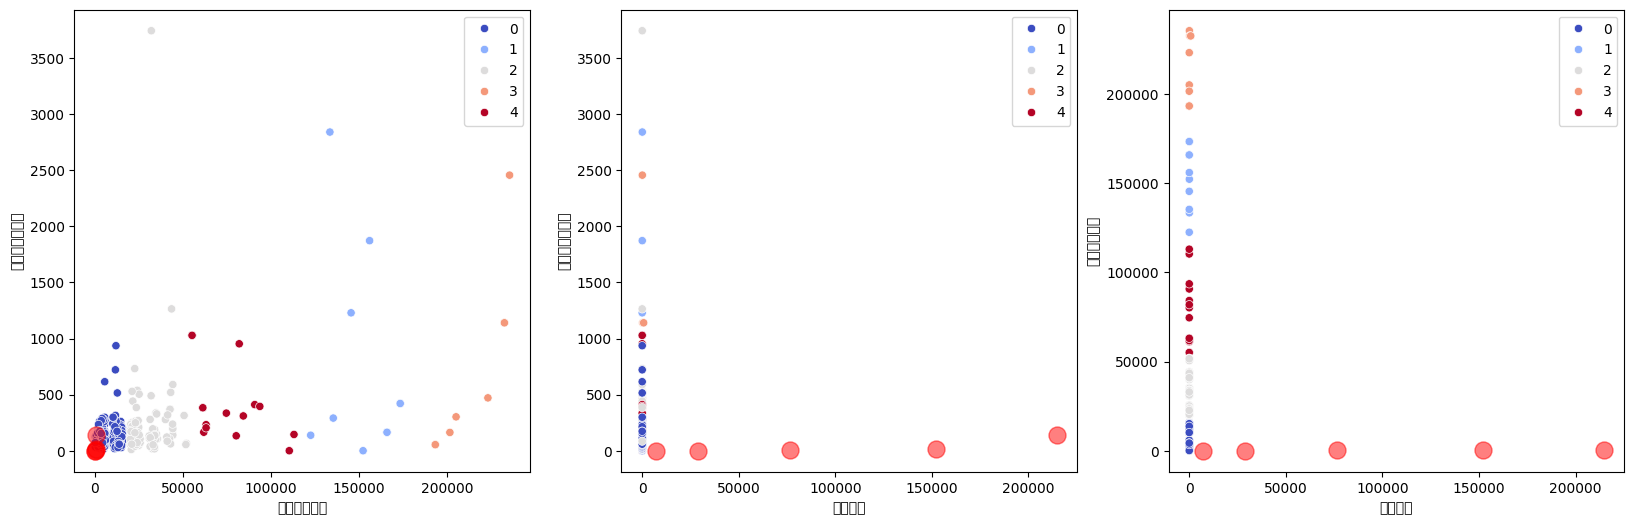

In [13]:
# scaling하지 않은 데이터를 kmeans(k=5)으로 학습하고 시각화

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_x)

plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='화재진압시간', y='전체인력수합계', data=df_x, hue=kmeans.labels_,palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)

plt.subplot(132)
sns.scatterplot(x='피해면적', y='전체인력수합계', data=df_x, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)

plt.subplot(133)
sns.scatterplot(x='피해면적', y='화재진압시간', data=df_x, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', alpha=0.5, s=150)

In [14]:
kmeans.cluster_centers_ #클러스트 중심(centroid)

array([[7.35627371e+03, 1.10487805e+02, 1.81842818e-01],
       [1.52317900e+05, 7.54000000e+02, 1.83080000e+01],
       [2.88037759e+04, 2.17637931e+02, 9.48706897e-01],
       [2.14578250e+05, 7.22500000e+02, 1.40553750e+02],
       [7.66331333e+04, 4.07000000e+02, 3.97733333e+00]])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

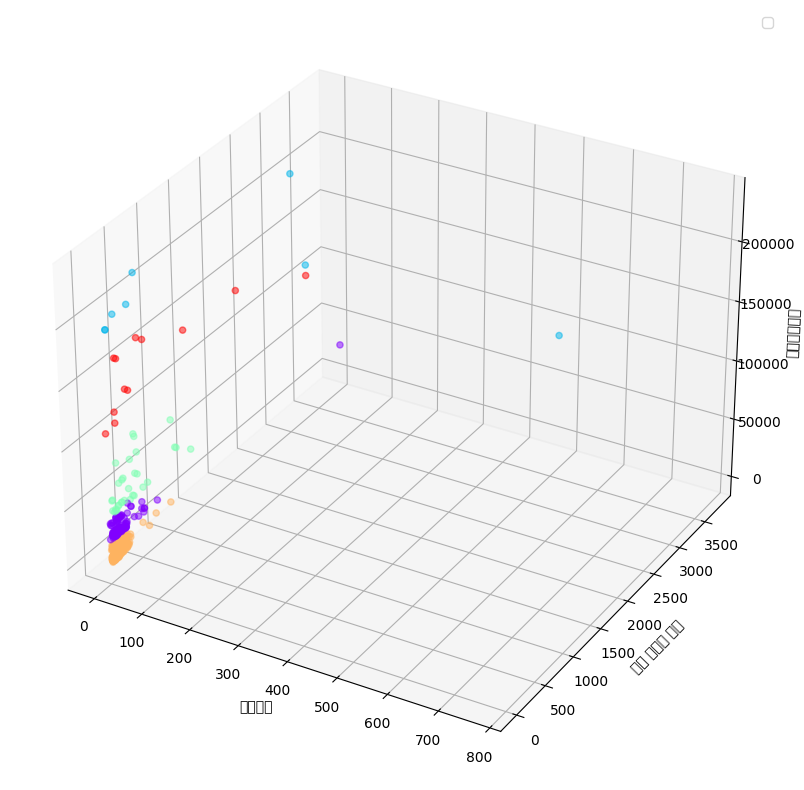

In [15]:
# 위의 clustering 결과를 3차원 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
labels =kmeans.fit_predict(df_x)

x = df_x['피해면적']
y = df_x['전체인력수합계']
z = df_x['화재진압시간']
ax.set_xlabel('피해면적',fontsize=10)
ax.set_ylabel('전체 인력수 합계',fontsize=10)
ax.set_zlabel('화재진압시간',fontsize=10)

ax.scatter(x, y, z, c = labels, s= 20, alpha=0.5, cmap='rainbow')
ax.legend(loc= 1)
plt.show()

DBSCAN Clustering

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

1871.12624440469


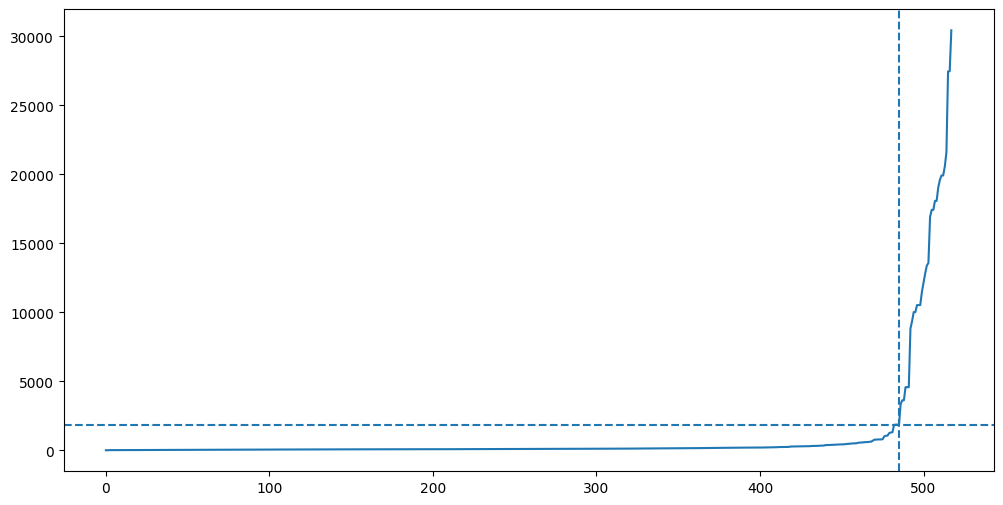

In [17]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df_x)
distances, indices = neigh.kneighbors(df_x)

# 4-dist를 plotting 해보기
# 저 빨간점에서 급격히 4-dist가 급증하였다 -> 우리는 이 때의 distance인 1871을 eps로, 485를 minpts로 잡고 DBSCAN을 진행해보도록 하자.
plt.figure(figsize=(12, 6))
plt.plot(np.sort(distances[:,4]))
plt.axvline(485, 0, 2, ls='--')
plt.axhline(1871, 0, 200, ls='--')

print(np.sort(distances[:, 4])[485])

[-1  0  1  2  3  4  5]


<Axes: xlabel='피해면적', ylabel='화재진압시간'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  func(*ar

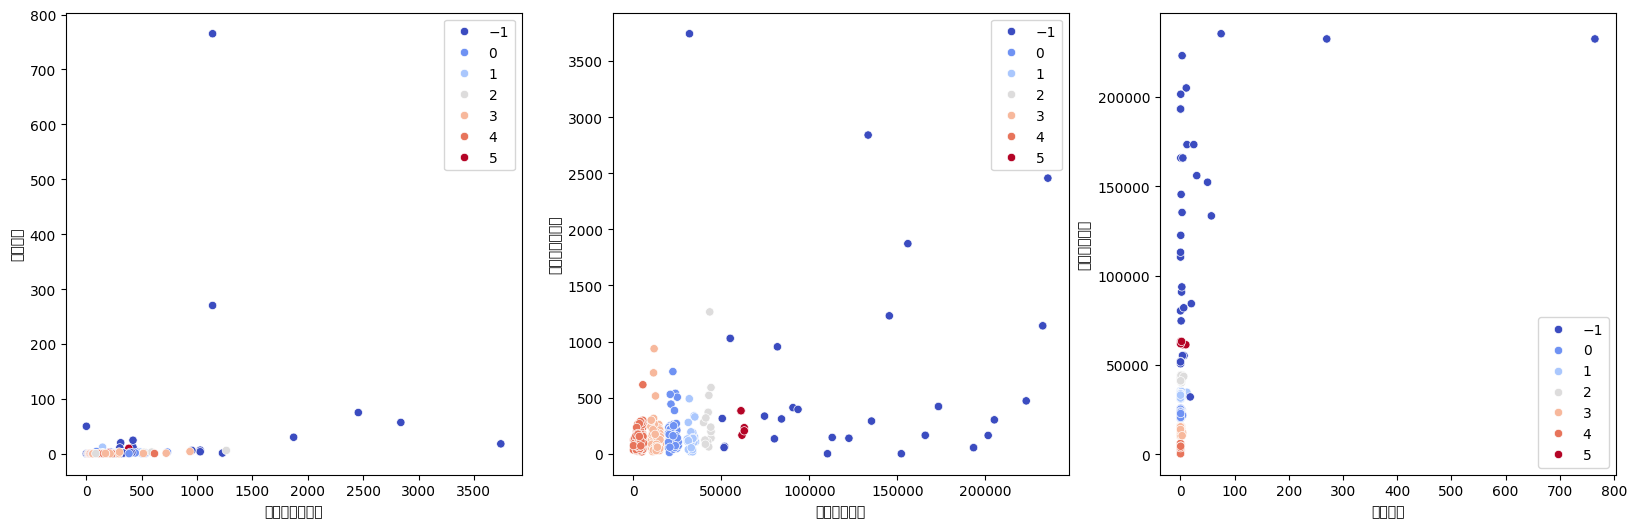

In [18]:
dbscan = DBSCAN(eps=1871, min_samples=4) # scaling 하지 않은 데이터로 DBSCAN 학습
dbscan.fit(df_x)

print(np.unique(dbscan.labels_))

plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='전체인력수합계', y='피해면적', data=df_x, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(132)
sns.scatterplot(x='화재진압시간', y='전체인력수합계', data=df_x, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(133)
sns.scatterplot(x='피해면적', y='화재진압시간', data=df_x, hue=dbscan.labels_, palette='coolwarm')


# DBSCAN한 결과 6개의 cluster 형성되었다. (-1은 noise point이나 같은 cluster로 진행)

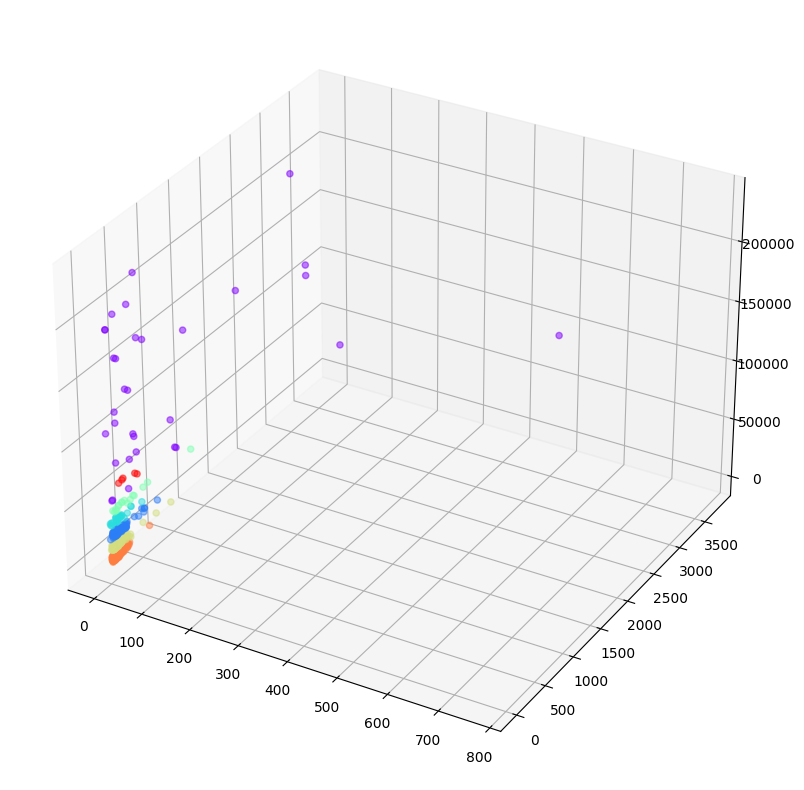

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x = df_x['피해면적']
y = df_x['전체인력수합계']
z = df_x['화재진압시간']
ax.scatter(x, y, z, c = dbscan.labels_, s= 20, alpha=0.5, cmap='rainbow')

###군집화 모델 선택 :

**kmeans (scaling X 원본 데이터) / dbscan이 분류가 가장 잘 된 것 같고 군집별로 어느정도 데이터도 있음** <br>
kmeans는 n_cluster를 5로 정해서 피해 규모가 적은 산불들 데이터가 대부분이라 그에 맞게 데이터가 몇 클러스터에 편향되어 있지만 시각화시 분류가 가장 합리적<br> 반면 dbscan은 데이터들이 고르게 좀 더 많은 군집 수로 분류되었고(n_cluster 지정 X) , 기존에 noise point로 이상치로 분류된 -1 그룹도 넣어줘서 클러스터 수가 많지만 클러스터 수별로 데이터도 kmeans보다는 더 많음

In [20]:
df['label_dbscan']=dbscan.labels_+1
df['label_kmeans']=kmeans.labels_

In [21]:
df.label_kmeans.value_counts()

3    369
0     97
2     32
4     12
1      8
Name: label_kmeans, dtype: int64

In [22]:
#df=df.drop(columns=['damagearea'])

##피해 규모 예측 모델링 진행 (Auto-ml)

In [23]:
Data = pd.read_csv('/content/drive/MyDrive/유진_나경_프로젝트 정리 폴더/환경 데이터 분석/1.Data/label_df.csv',encoding= 'cp949')
Data.head(5)


,Unnamed: 0,연도,월,일,시간,시군구명,읍면동명,온도,습도,시간단위풍속,현장소방서거리,화재진압시간,전체인력수합계,피해면적,label_dbscan,label_kmeans
0,2,2021,1,12,11,홍천군,동면,-7,59,270.0,27,24740,48,0.15,1,0
1,3,2021,1,12,11,홍천군,동면,-8,59,270.0,28,24740,48,0.15,1,0
2,4,2021,1,15,15,인제군,인제읍,-2,69,315.0,11,193251,54,0.02,0,1
3,5,2021,1,15,15,인제군,인제읍,-2,69,315.0,11,193251,54,0.21,0,1
4,7,2021,1,20,14,횡성군,공근면,6,31,225.0,14,20028,92,0.15,1,0


In [24]:
Data.describe()

,Unnamed: 0,연도,월,일,시간,온도,습도,시간단위풍속,현장소방서거리,화재진압시간,전체인력수합계,피해면적,label_dbscan,label_kmeans
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,487.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,602.457529,2016.125483,4.557915,15.023166,14.119691,14.569498,34.951737,190.811088,25.725869,20164.102317,164.944015,2.981313,3.652510,2.306950
std,323.241185,2.713546,2.585394,8.654973,2.838864,9.579051,38.983600,91.398650,15.895030,34640.896044,281.519967,35.945850,1.656972,1.265672
min,2.000000,2011.000000,1.000000,1.000000,10.000000,-11.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.010000,0.000000,0.000000
25%,386.500000,2014.000000,3.000000,7.000000,12.000000,7.000000,20.000000,135.000000,13.000000,4319.250000,68.000000,0.032500,3.000000,2.000000
50%,620.500000,2016.000000,4.000000,15.000000,14.000000,16.000000,30.000000,225.000000,24.000000,11314.000000,102.500000,0.100000,4.000000,3.000000
75%,860.250000,2018.000000,5.000000,22.000000,15.750000,22.000000,44.000000,270.000000,35.000000,21054.500000,160.000000,0.300000,5.000000,3.000000
max,1161.000000,2021.000000,12.000000,31.000000,23.000000,37.000000,550.000000,315.000000,80.000000,235419.000000,3743.000000,765.000000,6.000000,4.000000


In [25]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    518 non-null    int64  
 1   연도            518 non-null    int64  
 2   월             518 non-null    int64  
 3   일             518 non-null    int64  
 4   시간            518 non-null    int64  
 5   시군구명          518 non-null    object 
 6   읍면동명          518 non-null    object 
 7   온도            518 non-null    int64  
 8   습도            518 non-null    int64  
 9   시간단위풍속        487 non-null    float64
 10  현장소방서거리       518 non-null    int64  
 11  화재진압시간        518 non-null    int64  
 12  전체인력수합계       518 non-null    int64  
 13  피해면적          518 non-null    float64
 14  label_dbscan  518 non-null    int64  
 15  label_kmeans  518 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 64.9+ KB


###나무 데이터 추가버전이랑 아닌 버전 Data랑 Data_t로 구분해서 돌려보기

In [26]:
t = pd.read_csv('/content/drive/MyDrive/유진_나경_프로젝트 정리 폴더/환경 데이터 분석/1.Data/emd_tree_data.csv',encoding= 'utf-8-sig')


In [27]:
label_tree = Data.copy()

In [28]:
label_tree .loc[(label_tree['시군구명']=='양구군') & (label_tree ['읍면동명']=='남면'),'읍면동명'] = '국토정중앙면'
label_tree .loc[(label_tree['시군구명']=='홍천군') & (label_tree ['읍면동명']=='동면'),'읍면동명'] = '영귀미면'
label_tree .loc[(label_tree['시군구명']=='영월군') & (label_tree ['읍면동명']=='중동면'),'읍면동명'] = '산솔면'
label_tree .loc[(label_tree['시군구명']=='영월군') & (label_tree ['읍면동명']=='수주면'),'읍면동명'] = '무릉도원면'

In [29]:
label_tree['주소'] = 0

for i in range(len(label_tree)):
  label_tree['주소'][i] = "강원도 " + label_tree['시군구명'][i] +" "+ label_tree['읍면동명'][i]

<ipython-input-29-a9cb1962d49d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_tree['주소'][i] = "강원도 " + label_tree['시군구명'][i] +" "+ label_tree['읍면동명'][i]


In [30]:
label_tree

,Unnamed: 0,연도,월,일,시간,시군구명,읍면동명,온도,습도,시간단위풍속,현장소방서거리,화재진압시간,전체인력수합계,피해면적,label_dbscan,label_kmeans,주소
0,2,2021,1,12,11,홍천군,영귀미면,-7,59,270.0,27,24740,48,0.15,1,0,강원도 홍천군 영귀미면
1,3,2021,1,12,11,홍천군,영귀미면,-8,59,270.0,28,24740,48,0.15,1,0,강원도 홍천군 영귀미면
2,4,2021,1,15,15,인제군,인제읍,-2,69,315.0,11,193251,54,0.02,0,1,강원도 인제군 인제읍
3,5,2021,1,15,15,인제군,인제읍,-2,69,315.0,11,193251,54,0.21,0,1,강원도 인제군 인제읍
4,7,2021,1,20,14,횡성군,공근면,6,31,225.0,14,20028,92,0.15,1,0,강원도 횡성군 공근면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,1146,2011,6,12,14,삼척시,마평동,19,75,0.0,13,33000,53,0.10,2,0,강원도 삼척시 마평동
514,1149,2011,10,6,18,화천군,화천읍,18,34,225.0,57,4400,70,0.30,5,3,강원도 화천군 화천읍
515,1150,2011,10,7,14,홍천군,남면,21,31,225.0,18,13802,58,0.01,4,3,강원도 홍천군 남면
516,1157,2011,11,1,15,화천군,화천읍,14,63,135.0,57,10300,299,3.00,4,3,강원도 화천군 화천읍


In [31]:
Data_t = pd.merge(label_tree, t, left_on='주소', right_on='주소', how='left')

In [32]:
Data_t = Data_t.drop(columns=['Unnamed: 0_x', '주소', 'Unnamed: 0_y', '시군구', '읍면동'])

In [33]:
#임상 포함 X
for i in range(len(Data)):
  if Data['label_kmeans'][i] == 1:
    Data['label_kmeans'][i] = "A"
  elif Data['label_kmeans'][i] == 4:
    Data['label_kmeans'][i] = "B"
  elif Data['label_kmeans'][i] == 2:
    Data['label_kmeans'][i] = "C"
  elif Data['label_kmeans'][i] == 0:
    Data['label_kmeans'][i] = "D"
  elif Data['label_kmeans'][i] == 3:
    Data['label_kmeans'][i] = "E"

<ipython-input-33-da91cd52d523>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['label_kmeans'][i] = "D"


In [34]:
#임상 포함
for i in range(len(Data_t)):
  if Data_t['label_kmeans'][i] == 1:
    Data_t['label_kmeans'][i] = "A"
  elif Data_t['label_kmeans'][i] == 4:
    Data_t['label_kmeans'][i] = "B"
  elif Data_t['label_kmeans'][i] == 2:
    Data_t['label_kmeans'][i] = "C"
  elif Data_t['label_kmeans'][i] == 0:
    Data_t['label_kmeans'][i] = "D"
  elif Data_t['label_kmeans'][i] == 3:
    Data_t['label_kmeans'][i] = "E"
 #다 돌리고 pred에 적용하는 게 낫지 않을까?

<ipython-input-34-93c43cdf277a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_t['label_kmeans'][i] = "D"


클러스터링 파일 참고해서 각 클러스터링 결과마다 군집별 특징이 어떻게 나왔는지 확인

각각
DBSCAN-7개
KMEANs-5개 군집로 나뉜다.

###증강된 데이터로 Auto ml Modeling 진행

In [35]:
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [36]:
#컬럼별 누락값 확인
#X.isna().sum(axis=0)

In [37]:
Data.groupby(['월','시간']).시간단위풍속.median()
Data_t.groupby(['월','시간']).시간단위풍속.median()

월   시간
1   10    225.0
    11    202.5
    12    225.0
    13     45.0
    14    202.5
          ...  
12  12     45.0
    13    135.0
    14     45.0
    16    315.0
    21    315.0
Name: 시간단위풍속, Length: 108, dtype: float64

In [38]:
시간단위풍속=Data.groupby(['월','시간']).시간단위풍속.transform(lambda g:g.fillna(g.median()))
시간단위풍속2=Data_t.groupby(['월','시간']).시간단위풍속.transform(lambda g:g.fillna(g.median()))
시간단위풍속

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0      270.0
1      270.0
2      315.0
3      315.0
4      225.0
       ...  
513      0.0
514    225.0
515    225.0
516    135.0
517    180.0
Name: 시간단위풍속, Length: 518, dtype: float64

In [39]:
X_t=Data_t[['월','시간','온도','습도','시간단위풍속','현장소방서거리','STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU']]
X_t

,월,시간,온도,습도,시간단위풍속,현장소방서거리,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU
0,1,11,-7,59,270.0,27,1,1,1,13
1,1,11,-8,59,270.0,28,1,1,1,13
2,1,15,-2,69,315.0,11,1,1,1,13
3,1,15,-2,69,315.0,11,1,1,1,13
4,1,14,6,31,225.0,14,1,1,2,30
...,...,...,...,...,...,...,...,...,...,...
513,6,14,19,75,0.0,13,1,1,1,12
514,10,18,18,34,225.0,57,1,2,2,34
515,10,14,21,31,225.0,18,1,2,2,30
516,11,15,14,63,135.0,57,1,2,2,34


In [40]:
#결측치 잘 채워졌는지 확인
X_t.isna().sum()

월              0
시간             0
온도             0
습도             0
시간단위풍속        31
현장소방서거리        0
STORUNST       0
FROR_CD        0
FRTP_CD        0
KOFTR_GROU     0
dtype: int64

In [41]:
Data

,Unnamed: 0,연도,월,일,시간,시군구명,읍면동명,온도,습도,시간단위풍속,현장소방서거리,화재진압시간,전체인력수합계,피해면적,label_dbscan,label_kmeans
0,2,2021,1,12,11,홍천군,동면,-7,59,270.0,27,24740,48,0.15,1,D
1,3,2021,1,12,11,홍천군,동면,-8,59,270.0,28,24740,48,0.15,1,D
2,4,2021,1,15,15,인제군,인제읍,-2,69,315.0,11,193251,54,0.02,0,A
3,5,2021,1,15,15,인제군,인제읍,-2,69,315.0,11,193251,54,0.21,0,A
4,7,2021,1,20,14,횡성군,공근면,6,31,225.0,14,20028,92,0.15,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,1146,2011,6,12,14,삼척시,마평동,19,75,0.0,13,33000,53,0.10,2,D
514,1149,2011,10,6,18,화천군,화천읍,18,34,225.0,57,4400,70,0.30,5,E
515,1150,2011,10,7,14,홍천군,남면,21,31,225.0,18,13802,58,0.01,4,E
516,1157,2011,11,1,15,화천군,화천읍,14,63,135.0,57,10300,299,3.00,4,E


In [42]:
Data['시간단위풍속']=시간단위풍속
Data_t['시간단위풍속']=시간단위풍속2
Data.loc[Data['시간단위풍속'].isnull()]

,Unnamed: 0,연도,월,일,시간,시군구명,읍면동명,온도,습도,시간단위풍속,현장소방서거리,화재진압시간,전체인력수합계,피해면적,label_dbscan,label_kmeans
137,408,2017,2,28,10,홍천군,내촌면,0,0,NaN,39,3751,110,0.2,5,E


In [43]:
Data = Data.dropna()
Data_t = Data_t.dropna()

In [44]:
#Data['시간단위풍속'].fillna(Data['시간단위풍속'].median())

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Data_t['label_kmeans'] = encoder.fit_transform(Data_t['label_kmeans'])
Data['label_kmeans'] = encoder.fit_transform(Data['label_kmeans'])

<ipython-input-45-62fa374d4ee5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['label_kmeans'] = encoder.fit_transform(Data['label_kmeans'])


In [46]:
#일단 사후 데이터까지 적용시켜 성능 확인
X=Data[['월','시간','온도','습도','시간단위풍속','현장소방서거리']]
X_t=Data_t[['월','시간','온도','습도','시간단위풍속','현장소방서거리','STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU']]
y1=Data['label_kmeans']

In [47]:
X_t

,월,시간,온도,습도,시간단위풍속,현장소방서거리,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU
0,1,11,-7,59,270.0,27,1,1,1,13
1,1,11,-8,59,270.0,28,1,1,1,13
2,1,15,-2,69,315.0,11,1,1,1,13
3,1,15,-2,69,315.0,11,1,1,1,13
4,1,14,6,31,225.0,14,1,1,2,30
...,...,...,...,...,...,...,...,...,...,...
513,6,14,19,75,0.0,13,1,1,1,12
514,10,18,18,34,225.0,57,1,2,2,34
515,10,14,21,31,225.0,18,1,2,2,30
516,11,15,14,63,135.0,57,1,2,2,34


In [48]:
X_t.isna().sum()

월             0
시간            0
온도            0
습도            0
시간단위풍속        0
현장소방서거리       0
STORUNST      0
FROR_CD       0
FRTP_CD       0
KOFTR_GROU    0
dtype: int64

In [49]:
X_t=Data_t[['온도','습도','시간단위풍속','현장소방서거리']]
X_cat = pd.get_dummies(data = Data_t[['월','STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU']], columns = ['월','STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU'])
X_t = pd.concat([X_t, X_cat],axis=1)
y_t=Data_t['label_kmeans']

In [50]:
X_t=Data_t[['월','시간','온도','습도','시간단위풍속','현장소방서거리','STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU']]
y_t=Data_t['label_kmeans']

In [51]:
X_t

,월,시간,온도,습도,시간단위풍속,현장소방서거리,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU
0,1,11,-7,59,270.0,27,1,1,1,13
1,1,11,-8,59,270.0,28,1,1,1,13
2,1,15,-2,69,315.0,11,1,1,1,13
3,1,15,-2,69,315.0,11,1,1,1,13
4,1,14,6,31,225.0,14,1,1,2,30
...,...,...,...,...,...,...,...,...,...,...
513,6,14,19,75,0.0,13,1,1,1,12
514,10,18,18,34,225.0,57,1,2,2,34
515,10,14,21,31,225.0,18,1,2,2,30
516,11,15,14,63,135.0,57,1,2,2,34


Pycaret
https://pycaret.gitbook.io/docs/

fold k겹 교차검증

n_select 가장 좋은 성능의 n가지 모델을 추려내어 저장한다.

sort='지표' 로 지표 설정 가능

임상 미포함 변수

X , y1(K_means만 남김.)

임상 포함 변수

X_t , y_t

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_t,

                                                    y_t,

                                                    test_size=0.2,

                                                    shuffle=True,

                                                    random_state=1004)

In [53]:
x_test

,월,시간,온도,습도,시간단위풍속,현장소방서거리,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU
36,4,21,6,95,270.0,61,1,2,1,11
242,2,15,6,0,270.0,32,1,2,1,11
183,5,14,20,55,135.0,13,1,1,1,13
342,5,17,21,22,270.0,53,1,1,1,13
456,5,12,24,32,270.0,18,1,2,1,11
...,...,...,...,...,...,...,...,...,...,...
421,5,19,8,68,315.0,67,1,2,2,30
399,4,13,21,37,225.0,60,1,1,1,12
258,4,14,23,20,225.0,33,1,1,2,32
248,3,13,0,0,202.5,14,1,1,1,13


In [54]:
y_test.value_counts()

4    74
3    22
2     4
1     3
0     1
Name: label_kmeans, dtype: int64

In [55]:
#train set에 대해 증강 진행

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_train_over,y_train_over = smote.fit_resample(x_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', y_train_over.value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (413, 10) (413,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (1470, 10) (1470,)
SMOTE 적용 후 레이블 값 분포: 
 4    294
3    294
0    294
1    294
2    294
Name: label_kmeans, dtype: int64


In [56]:
'''x_train = train.drop(['ID'], axis = 1)
# y_train = train['TARGET']

x_test = test.drop('ID', axis = 1)'''

"x_train = train.drop(['ID'], axis = 1)\n# y_train = train['TARGET']\n\nx_test = test.drop('ID', axis = 1)"

In [57]:
!pip install pycaret

In [58]:
Data[['연도','월','일','시간']].head(30)
#무작위 배치되어있지만 앞뒤로 그나마 같은 시간대를 보임.x,y split을 통해 그 시간차는 더욱 커질 것
#같은 월,시간 중앙값이 좋지 않을까

,연도,월,일,시간
0,2021,1,12,11
1,2021,1,12,11
2,2021,1,15,15
3,2021,1,15,15
4,2021,1,20,14
5,2021,1,20,14
6,2021,1,24,17
7,2021,2,5,14
8,2021,2,5,14
9,2021,2,9,13


In [59]:
#시간단위 풍속에서 NaN값이 보이는 데 어떻게 처리하는게 좋을까?
x_test.value_counts

<bound method DataFrame.value_counts of      월  시간  온도  습도  시간단위풍속  현장소방서거리  STORUNST  FROR_CD  FRTP_CD  KOFTR_GROU
36   4  21   6  95   270.0       61         1        2        1          11
242  2  15   6   0   270.0       32         1        2        1          11
183  5  14  20  55   135.0       13         1        1        1          13
342  5  17  21  22   270.0       53         1        1        1          13
456  5  12  24  32   270.0       18         1        2        1          11
..  ..  ..  ..  ..     ...      ...       ...      ...      ...         ...
421  5  19   8  68   315.0       67         1        2        2          30
399  4  13  21  37   225.0       60         1        1        1          12
258  4  14  23  20   225.0       33         1        1        2          32
248  3  13   0   0   202.5       14         1        1        1          13
282  6  12  32  12   270.0       30         1        1        1          12

[104 rows x 10 columns]>

임상 포함/미포함, 라벨인코팅,원핫인코딩,데이터 증강 등 여러 케이스에서 진행한 결과 라벨인코딩으로 임상 변수를 포함한 모델이 전체 지표와 화재 규모가 높을 위험이 높은 화재를 잘 잡아내는지 여부에서 양호한 결과를 보여 채택하였다.

In [60]:
from pycaret import classification
classification.setup(data=x_train,target=y_train,remove_outliers=True)


,Description,Value
0,Session id,1974
1,Target,label_kmeans
2,Target type,Multiclass
3,Original data shape,"(413, 11)"
4,Transformed data shape,"(398, 11)"
5,Transformed train set shape,"(274, 11)"
6,Transformed test set shape,"(124, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [61]:
best=classification.compare_models(n_select=3,fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7578,0.6572,0.7578,0.7126,0.7062,0.2964,0.3514,0.5700
rf,Random Forest Classifier,0.7441,0.6696,0.7441,0.6884,0.6780,0.2289,0.2932,0.7680
lightgbm,Light Gradient Boosting Machine,0.7197,0.6380,0.7197,0.6805,0.6915,0.2770,0.2923,0.3480
ridge,Ridge Classifier,0.7129,0.0000,0.7129,0.5409,0.6038,0.0224,0.0275,0.4260
dummy,Dummy Classifier,0.7128,0.5000,0.7128,0.5082,0.5933,0.0000,0.0000,0.1980
xgboost,Extreme Gradient Boosting,0.7058,0.6400,0.7058,0.6437,0.6666,0.2052,0.2161,0.3680
lr,Logistic Regression,0.6956,0.5652,0.6956,0.5393,0.5966,0.0093,-0.0040,2.7020
gbc,Gradient Boosting Classifier,0.6886,0.6144,0.6886,0.6349,0.6529,0.1794,0.1886,1.2040
lda,Linear Discriminant Analysis,0.6852,0.5439,0.6852,0.5116,0.5856,0.0044,0.0028,0.2020
svm,SVM - Linear Kernel,0.6714,0.0000,0.6714,0.5283,0.5845,0.0121,0.0165,0.6980


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [62]:
best

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1974, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_sco

In [63]:
probas = []
for model in best:
    probas.append(model.predict_proba(x_test))

pred = [np.argmax(i) for i in np.array(probas).mean(axis=0)]

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_smote=confusion_matrix(y_test,pred)
matrix_smote

array([[ 0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  2],
       [ 0,  0,  0,  1,  3],
       [ 0,  0,  0,  5, 17],
       [ 0,  0,  1,  2, 71]])

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         4
           3       0.62      0.23      0.33        22
           4       0.76      0.96      0.85        74

    accuracy                           0.74       104
   macro avg       0.48      0.30      0.34       104
weighted avg       0.70      0.74      0.69       104

